# Stock Prices Prediction Using Keras Long Term Short Memory
## 使用Keras长期短记忆预测股票价格

In [16]:
# Part 1 - 数据预处理

# 导入库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
# 导入训练集
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
# 选取训练集第二列'Open'的所有行
training_set = dataset_train.iloc[:, 1:2].values
print(training_set.shape)
training_set

(2035, 1)


array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [18]:
# 查看训练集数据的表头
print(dataset_train.shape)
dataset_train.head()

(2035, 8)


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [32]:
# 特征缩放，将training_set即Open列数据缩放在（0,1）之间，数据标准化，方便比较。
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [71]:
# 创建具有60个时间步长和1个输出的数据结构，，每一步表示一个特征。
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [72]:
# 将二维数组转为三维数组,shape为( 1975, 60，1 )
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
# Part 2 - 构建LSTM

# 导入Keras库和包
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [19]:
# 初始化RNN
regressor = Sequential()

# 添加第一个LSTM层和一些Dropout正则化
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [20]:
# 添加第二个LSTM层和一些Dropout正则化
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [21]:

# 添加第三个LSTM层和一些Dropout正则化
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [22]:
# 添加第四个LSTM层和一些Dropout正则化
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [23]:
# 添加输出图层
regressor.add(Dense(units = 1))

# 编译RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 将RNN安装到训练集
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



W0701 22:21:01.769928  8636 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0701 22:21:02.135949  8636 deprecation.py:323] From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0701 22:21:05.182123  8636 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1975/1975 [==============================] - 14s 7ms/step - loss: 0.0088
Epoch 2/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0028
Epoch 3/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0025
Epoch 4/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0026
Epoch 5/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0023
Epoch 6/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0022
Epoch 7/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0021
Epoch 8/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0023
Epoch 9/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0019
Epoch 10/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0020: 0s - loss: 0.0
Epoch 11/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0019: 2s 
Epoch 12/100
1975/1975 [==================

In [81]:
# Part 3 - 进行预测并可视化结果

# 获得2017年的实际股票价格
dataset_test = pd.read_csv('tatatest.csv')
# 选取2017年的实际股票价格'Open'列数据
real_stock_price = dataset_test.iloc[:, 1:2].values

In [74]:
# 获得2017年的预测股票价格

# 纵向连接训练集'Open'列与测试集'Open'列
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


NameError: name 'regressor' is not defined

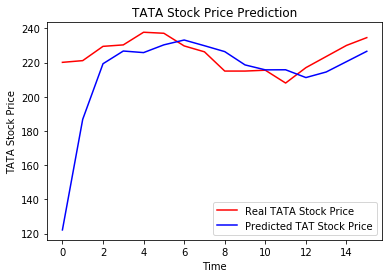

In [26]:
# 可视化结果
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()